<a href="https://colab.research.google.com/github/Abrx1921/Data-Science-Portfolio/blob/main/SQL_Chinook_Project_AbrahamSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [ ]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database

import sqlite3 as db


In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3


#### Setting Up the Data


In [ ]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
!rm -f chinook.db


In [ ]:
!unzip -u chinook.zip


Archive:  chinook.zip
  inflating: chinook.db              


In [ ]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Oct 28 03:29 .
drwxr-xr-x 1 root root   4096 Oct 28 03:24 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Oct 28 03:29 chinook.zip
drwxr-xr-x 4 root root   4096 Oct 24 13:37 .config
drwxr-xr-x 1 root root   4096 Oct 24 13:37 sample_data


#### Chinook Data Info

The [Chinook sample](https://www.sqlitetutorial.net/sqlite-sample-database/)

- Zip file of [sqlite DB](https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip)

- [ER diagram](https://www.sqlitetutorial.net/wp-content/uploads/2018/03/sqlite-sample-database-diagram-color.pdf)

- [ER symbols/meanings](https://d2slcw3kip6qmk.cloudfront.net/marketing/pages/chart/erd-symbols/ERD-Notation.PNG)

- [Draw IO](https://app.diagrams.net/) for creating ER diagrams, flowcharts, etc.

In [ ]:
# Tables
%%script sqlite3 --column --header chinook.db
.tables

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [ ]:
# Schema
%%script sqlite3 --column --header chinook.db
.schema

CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

In [ ]:
# Column Names
%%script sqlite3 --column --header chinook.db
PRAGMA table_info(customers)

cid  name          type          notnull  dflt_value  pk
---  ------------  ------------  -------  ----------  --
0    CustomerId    INTEGER       1                    1 
1    FirstName     NVARCHAR(40)  1                    0 
2    LastName      NVARCHAR(20)  1                    0 
3    Company       NVARCHAR(80)  0                    0 
4    Address       NVARCHAR(70)  0                    0 
5    City          NVARCHAR(40)  0                    0 
6    State         NVARCHAR(40)  0                    0 
7    Country       NVARCHAR(40)  0                    0 
8    PostalCode    NVARCHAR(10)  0                    0 
9    Phone         NVARCHAR(24)  0                    0 
10   Fax           NVARCHAR(24)  0                    0 
11   Email         NVARCHAR(60)  1                    0 
12   SupportRepId  INTEGER       0                    0 


## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


### Basic Queries


### Clauses Used 13/15

##### SELECT
##### COUNT
##### UNION
##### SUM
##### WHERE
##### LIMIT
##### ORDER BY
##### MIN
##### MAX
##### AVG
#####GROUP BY
#####DISTINCT
#####BETWEEN
#####AND


In [ ]:
# How many records are there? (Customers Table)
%%script sqlite3 --column --header chinook.db
SELECT count(1) as 'total_records'
FROM customers


total_records
-------------
59           


In [ ]:
# How many records are there? (All Tables)
%%script sqlite3 --column --header chinook.db
SELECT 'albums' AS table_name, COUNT(1) AS total_records FROM albums
UNION ALL
SELECT 'artists', COUNT(1) FROM artists
UNION ALL
SELECT 'customers', COUNT(1) FROM customers
UNION ALL
SELECT 'employees', COUNT(1) FROM employees
UNION ALL
SELECT 'genres', COUNT(1) FROM genres
UNION ALL
SELECT 'invoice_items', COUNT(1) FROM invoice_items
UNION ALL
SELECT 'invoices', COUNT(1) FROM invoices
UNION ALL
SELECT 'media_types', COUNT(1) FROM media_types
UNION ALL
SELECT 'playlist_track', COUNT(1) FROM playlist_track
UNION ALL
SELECT 'playlists', COUNT(1) FROM playlists
UNION ALL
SELECT 'tracks', COUNT(1) FROM tracks;


table_name      total_records
--------------  -------------
albums          347          
artists         275          
customers       59           
employees       8            
genres          25           
invoice_items   2240         
invoices        412          
media_types     5            
playlist_track  8715         
playlists       18           
tracks          3503         


In [ ]:
# How Many records total across all tables
%%script sqlite3 --column --header chinook.db
WITH record_sum AS (
  SELECT 'albums' AS table_name, COUNT(*) AS total_records FROM albums
  UNION ALL
  SELECT 'artists', COUNT(*) FROM artists
  UNION ALL
  SELECT 'customers', COUNT(*) FROM customers
  UNION ALL
  SELECT 'employees', COUNT(*) FROM employees
  UNION ALL
  SELECT 'genres', COUNT(*) FROM genres
  UNION ALL
  SELECT 'invoice_items', COUNT(*) FROM invoice_items
  UNION ALL
  SELECT 'invoices', COUNT(*) FROM invoices
  UNION ALL
  SELECT 'media_types', COUNT(*) FROM media_types
  UNION ALL
  SELECT 'playlist_track', COUNT(*) FROM playlist_track
  UNION ALL
  SELECT 'playlists', COUNT(*) FROM playlists
  UNION ALL
  SELECT 'tracks', COUNT(*) FROM tracks
)

SELECT table_name, total_records
FROM record_sum

UNION ALL

SELECT 'TOTAL' as table_name, SUM(total_records)
FROM record_sum;

table_name      total_records
--------------  -------------
albums          347          
artists         275          
customers       59           
employees       8            
genres          25           
invoice_items   2240         
invoices        412          
media_types     5            
playlist_track  8715         
playlists       18           
tracks          3503         
TOTAL           15607        


In [ ]:
%%script sqlite3 --column --header chinook.db

SELECT
  COUNT(p.name) AS NumColumns
FROM sqlite_master AS m
JOIN pragma_table_info(m.name) AS p
WHERE m.type = 'table'


NumColumns
----------
69        


In [ ]:
# What tracks are longer than 5 minutes (> 300,000 ms)
%%script sqlite3 --column --header chinook.db
SELECT name, ROUND(Milliseconds/60000.0, 2) as Length_in_Minutes
FROM tracks
WHERE Milliseconds > 300000
LIMIT 10

Name                                     Length_in_Minutes
---------------------------------------  -----------------
For Those About To Rock (We Salute You)  5.73             
Balls to the Wall                        5.71             
Princess of the Dawn                     6.26             
Go Down                                  5.52             
Let There Be Rock                        6.11             
Problem Child                            5.42             
Overdose                                 6.16             
Whole Lotta Rosie                        5.4              
Love In An Elevator                      5.36             
What It Takes                            5.18             


In [ ]:
# Tracks longer than 5 min, join album to see the corresponding album
%%script sqlite3 --column --header chinook.db

-- CTE

WITH long_tracks as (
SELECT
  name,
  AlbumId,
  ROUND(Milliseconds/60000.0, 2) as Length_in_Minutes
FROM tracks
WHERE Milliseconds > 300000
)

SELECT a.Title, lt.name, lt.Length_in_Minutes
FROM long_tracks as lt
JOIN albums as a
ON lt.AlbumId = a.AlbumId
ORDER BY lt.Length_in_Minutes




Title                                                                                            name                                                                                                                         Length_in_Minutes
-----------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------  -----------------
Jagged Little Pill                                                                               Forgiven                                                                                                                     5.01             
Alcohol Fueled Brewtality Live! [Disc 1]                                                         Stronger Than Death                                                                                                          5.01             
Body Count                              

In [ ]:
# Filter Tracks to see MIN, MAX and AVG (Mean)
%%script sqlite3 --column --header chinook.db

SELECT
  (SELECT Name FROM tracks ORDER BY Milliseconds DESC LIMIT 1) AS Longest_Track,
  ROUND(MAX(Milliseconds) / 60000.0, 2) AS Max_Length_Minutes,
  (SELECT Name FROM tracks ORDER BY Milliseconds ASC LIMIT 1) AS Shortest_Track,
  ROUND(MIN(Milliseconds) / 60000.0, 2) AS Min_Length_Minutes,
  ROUND(AVG(Milliseconds) / 60000.0, 2) AS Avg_Length_Minutes
FROM tracks;


Longest_Track           Max_Length_Minutes  Shortest_Track            Min_Length_Minutes  Avg_Length_Minutes
----------------------  ------------------  ------------------------  ------------------  ------------------
Occupation / Precipice  88.12               É Uma Partida De Futebol  0.02                6.56              


In [ ]:
# Composers with the most tracks
%%script sqlite3 --column --header chinook.db

SELECT
  composer,
  COUNT(1) as num_tracks
FROM tracks
WHERE composer IS NOT NULL
GROUP BY composer
ORDER BY num_tracks desc
LIMIT 10

Composer                                        num_tracks
----------------------------------------------  ----------
Steve Harris                                    80        
U2                                              44        
Jagger/Richards                                 35        
Billy Corgan                                    31        
Kurt Cobain                                     26        
Bill Berry-Peter Buck-Mike Mills-Michael Stipe  25        
The Tea Party                                   24        
Miles Davis                                     23        
Gilberto Gil                                    23        
Chris Cornell                                   23        


In [ ]:
# What Composer/s sold the most and made the most?
%%script sqlite3 --column --header chinook.db

SELECT
  t.Composer,
  ROUND(SUM(ii.UnitPrice * ii.Quantity), 2) AS total_sales,
  COUNT(DISTINCT ii.TrackId) AS num_tracks_sold
FROM invoice_items AS ii
JOIN tracks AS t ON t.TrackId = ii.TrackId
WHERE t.Composer IS NOT NULL
GROUP BY t.Composer
ORDER BY total_sales DESC
LIMIT 10;

Composer                                        total_sales  num_tracks_sold
----------------------------------------------  -----------  ---------------
Steve Harris                                    57.42        53             
U2                                              32.67        29             
Billy Corgan                                    22.77        18             
Titãs                                           21.78        18             
Bill Berry-Peter Buck-Mike Mills-Michael Stipe  21.78        18             
Herbert Vianna                                  20.79        18             
J.C. Fogerty                                    18.81        16             
Billie Joe Armstrong -Words Green Day -Music    17.82        15             
R.E.M.                                          16.83        14             
Gilberto Gil                                    16.83        15             


In [ ]:
# Unique Customers who made purchases
%%script sqlite3 --column --header chinook.db
SELECT DISTINCT CustomerId
FROM Invoices
ORDER BY CustomerId;

CustomerId
----------
1         
2         
3         
4         
5         
6         
7         
8         
9         
10        
11        
12        
13        
14        
15        
16        
17        
18        
19        
20        
21        
22        
23        
24        
25        
26        
27        
28        
29        
30        
31        
32        
33        
34        
35        
36        
37        
38        
39        
40        
41        
42        
43        
44        
45        
46        
47        
48        
49        
50        
51        
52        
53        
54        
55        
56        
57        
58        
59        


In [ ]:
# Customers who have spent BETWEEN 0 and 100 Buckaroos.
%%script sqlite3 --column --header chinook.db

WITH customer_totals AS (
  SELECT c.CustomerId,
  c.FirstName,
  c.LastName,
  SUM(it.UnitPrice * it.Quantity) as TotalSpent
  FROM Customers as c
  JOIN invoices as i
  ON c.CustomerId = i.CustomerId
  JOIN invoice_items as it
  ON it.InvoiceId = i.InvoiceId
  GROUP BY c.CustomerId, c.FirstName, c.LastName
)

SELECT CustomerId, FirstName, LastName, TotalSpent
FROM customer_totals
-- WHERE TotalSpent BETWEEN 0 AND 100
ORDER BY CustomerId


CustomerId  FirstName  LastName      TotalSpent
----------  ---------  ------------  ----------
1           Luís       Gonçalves     39.62     
2           Leonie     Köhler        37.62     
3           François   Tremblay      39.62     
4           Bjørn      Hansen        39.62     
5           František  Wichterlová   40.62     
6           Helena     Holý          49.62     
7           Astrid     Gruber        42.62     
8           Daan       Peeters       37.62     
9           Kara       Nielsen       37.62     
10          Eduardo    Martins       37.62     
11          Alexandre  Rocha         37.62     
12          Roberto    Almeida       37.62     
13          Fernanda   Ramos         37.62     
14          Mark       Philips       37.62     
15          Jennifer   Peterson      38.62     
16          Frank      Harris        37.62     
17          Jack       Smith         39.62     
18          Michelle   Brooks        37.62     
19          Tim        Goyer         38.

In [ ]:
# What are the different countries our customers are from
%%script sqlite3 --column --header chinook.db

SELECT Country, COUNT(Country) as CountryCount
FROM Customers
GROUP BY Country
ORDER BY CountryCount

Country         CountryCount
--------------  ------------
Argentina       1           
Australia       1           
Austria         1           
Belgium         1           
Chile           1           
Denmark         1           
Finland         1           
Hungary         1           
Ireland         1           
Italy           1           
Netherlands     1           
Norway          1           
Poland          1           
Spain           1           
Sweden          1           
Czech Republic  2           
India           2           
Portugal        2           
United Kingdom  3           
Germany         4           
Brazil          5           
France          5           
Canada          8           
USA             13          


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [ ]:
# Column Names
%%script sqlite3 --column --header chinook.db
PRAGMA table_info(invoices)

cid  name               type           notnull  dflt_value  pk
---  -----------------  -------------  -------  ----------  --
0    InvoiceId          INTEGER        1                    1 
1    CustomerId         INTEGER        1                    0 
2    InvoiceDate        DATETIME       1                    0 
3    BillingAddress     NVARCHAR(70)   0                    0 
4    BillingCity        NVARCHAR(40)   0                    0 
5    BillingState       NVARCHAR(40)   0                    0 
6    BillingCountry     NVARCHAR(40)   0                    0 
7    BillingPostalCode  NVARCHAR(10)   0                    0 
8    Total              NUMERIC(10,2)  1                    0 


In [ ]:
# What countries spent the most
%%script sqlite3 --column --header chinook.db

SELECT
  BillingCountry AS Country,
  ROUND(SUM(Total), 2) AS TotalSales
FROM Invoices
GROUP BY Country
ORDER BY TotalSales DESC;

Country         TotalSales
--------------  ----------
USA             523.06    
Canada          303.96    
France          195.1     
Brazil          190.1     
Germany         156.48    
United Kingdom  112.86    
Czech Republic  90.24     
Portugal        77.24     
India           75.26     
Chile           46.62     
Ireland         45.62     
Hungary         45.62     
Austria         42.62     
Finland         41.62     
Netherlands     40.62     
Norway          39.62     
Sweden          38.62     
Spain           37.62     
Poland          37.62     
Italy           37.62     
Denmark         37.62     
Belgium         37.62     
Australia       37.62     
Argentina       37.62     


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Connect to a sqlite database and load a result set into a data frame
db_con = db.connect("chinook.db")

query = ("""
SELECT BillingCountry AS Country, ROUND(SUM(Total), 2) AS TotalSales
FROM Invoices
GROUP BY Country
ORDER BY TotalSales DESC;
""" )

df = pd.read_sql_query(query, db_con)
df.head()

,Country,TotalSales
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48


In [ ]:
df.iloc[0:10]

,Country,TotalSales
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


In [ ]:
plt.bar?

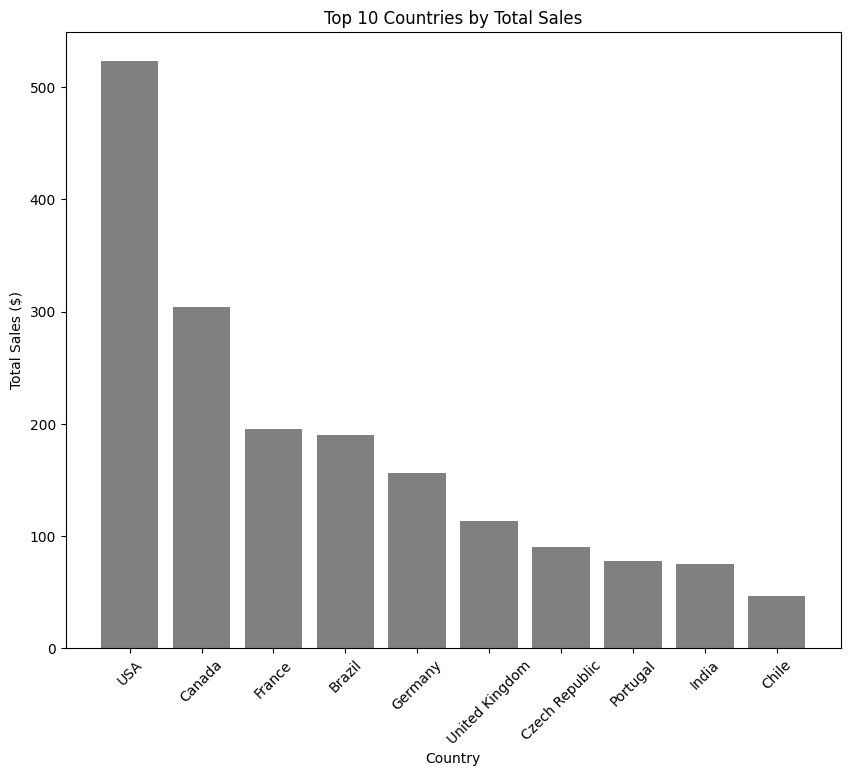

In [ ]:
# Plot top 10 countries who spent the most mula

top10 = df.iloc[0:10]
plt.figure(figsize=(10,8))
plt.bar(top10['Country'], top10['TotalSales'], color = 'gray')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)

# save the figure
plt.savefig("Top_10_Countries_by_Total_Sales.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT
  g.Name AS Genre,
  ROUND(SUM(ii.UnitPrice * ii.Quantity), 2) AS TotalSales
FROM invoice_items AS ii
JOIN tracks AS t ON ii.TrackId = t.TrackId
JOIN genres AS g ON t.GenreId = g.GenreId
GROUP BY g.Name
ORDER BY TotalSales DESC;


Genre               TotalSales
------------------  ----------
Rock                826.65    
Latin               382.14    
Metal               261.36    
Alternative & Punk  241.56    
TV Shows            93.53     
Jazz                79.2      
Blues               60.39     
Drama               57.71     
R&B/Soul            40.59     
Classical           40.59     
Sci Fi & Fantasy    39.8      
Reggae              29.7      
Pop                 27.72     
Soundtrack          19.8      
Comedy              17.91     
Hip Hop/Rap         16.83     
Bossa Nova          14.85     
Alternative         13.86     
World               12.87     
Science Fiction     11.94     
Heavy Metal         11.88     
Electronica/Dance   11.88     
Easy Listening      9.9       
Rock And Roll       5.94      


In [ ]:
# What Genres made the most
%%script sqlite3 --column --header chinook.db

WITH the_genres AS (
  SELECT
    GenreId,
    name
  FROM
    genres
),

genre_info AS(
  SELECT g.GenreId, g.Name, t.TrackId, it.TrackId, it.UnitPrice, it.Quantity
  FROM the_genres as g
  JOIN tracks as t
  ON g.GenreId = t.GenreId
  JOIN invoice_items as it
  ON t.TrackId = it.TrackId
)

SELECT
  Name,
  ROUND(SUM(UnitPrice * Quantity), 2) AS Total_Sales
FROM genre_info
GROUP BY Name
ORDER BY Total_Sales DESC
LIMIT 5




Name                Total_Sales
------------------  -----------
Rock                826.65     
Latin               382.14     
Metal               261.36     
Alternative & Punk  241.56     
TV Shows            93.53      


In [ ]:
# Connect to a sqlite database and load a result set into a data frame
db_con = db.connect("chinook.db")

query = ("""
WITH the_genres AS (
  SELECT
    GenreId,
    name
  FROM
    genres
),

genre_info AS(
  SELECT g.GenreId, g.Name, t.TrackId, it.TrackId, it.UnitPrice, it.Quantity
  FROM the_genres as g
  JOIN tracks as t
  ON g.GenreId = t.GenreId
  JOIN invoice_items as it
  ON t.TrackId = it.TrackId
)

SELECT
  Name,
  ROUND(SUM(UnitPrice * Quantity), 2) AS Total_Sales
FROM genre_info
GROUP BY Name
ORDER BY Total_Sales DESC
LIMIT 5
""" )

df2 = pd.read_sql_query(query, db_con)
df2.head()

,Name,Total_Sales
0,Rock,826.65
1,Latin,382.14
2,Metal,261.36
3,Alternative & Punk,241.56
4,TV Shows,93.53


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Rock'),
  Text(1, 0, 'Latin'),
  Text(2, 0, 'Metal'),
  Text(3, 0, 'Alternative & Punk'),
  Text(4, 0, 'TV Shows')])

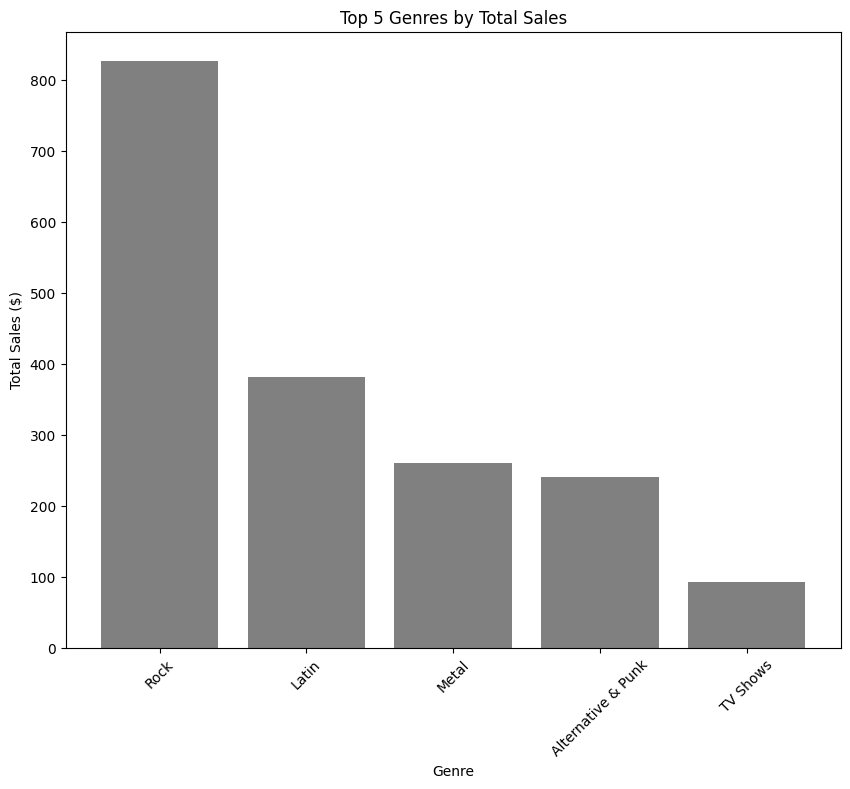

In [ ]:
# Plot what top 5 genres bring in the most revenue


plt.figure(figsize=(10,8))
plt.bar(df2['Name'], df2['Total_Sales'], color = 'gray')
plt.title('Top 5 Genres by Total Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)



## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


Model: Multi-Linear Regression
- Supervised Learning Problem
- Regression (Numerical Target)

In [ ]:
# Grab all the features necessary
# Target = Total
# Predictors = BillingCountry, Quantity, Genres (Name), Bytes, Milliseconds, MediaTypes (Name)

%%script sqlite3 --column --header chinook.db

WITH inv_cols as (SELECT
  Total,
  BillingCountry,
  InvoiceId
FROM Invoices
),

all_features as (
  SELECT i.InvoiceId, i.BillingCountry, i.Total, it.TrackId, t.Trackid, t.Milliseconds, t.Bytes, t.GenreId, g.GenreId, g.Name
  FROM inv_cols as i
  JOIN invoice_items as it
  ON i.InvoiceId = it.InvoiceId
  JOIN tracks as t
  ON t.TrackId = it.TrackId
  JOIN genres as g
  ON t.GenreId = g.GenreId
  JOIN media_types AS m
  ON t.MediaTypeId = m.MediaTypeId
)

SELECT *
FROM all_features




InvoiceId  BillingCountry  Total  TrackId  Trackid:1  Milliseconds  Bytes       GenreId  GenreId:1  Name              
---------  --------------  -----  -------  ---------  ------------  ----------  -------  ---------  ------------------
1          Germany         1.98   2        2          342562        5510424     1        1          Rock              
1          Germany         1.98   4        4          252051        4331779     1        1          Rock              
2          Norway          3.96   6        6          205662        6713451     1        1          Rock              
2          Norway          3.96   8        8          210834        6852860     1        1          Rock              
2          Norway          3.96   10       10         263497        8611245     1        1          Rock              
2          Norway          3.96   12       12         263288        8596840     1        1          Rock              
3          Belgium         5.94   16       16   

In [ ]:
%%script sqlite3 --column --header chinook.db

SELECT Name AS types_of_media
FROM media_types

types_of_media             
---------------------------
MPEG audio file            
Protected AAC audio file   
Protected MPEG-4 video file
Purchased AAC audio file   
AAC audio file             


In [ ]:
# Schema
%%script sqlite3 --column --header chinook.db
.schema

CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

In [ ]:
%%script sqlite3 --column --header chinook.db

WITH inv_cols AS (
  SELECT InvoiceId, BillingCountry, Total
  FROM Invoices
),
all_features AS (
  SELECT
    i.InvoiceId,
    i.BillingCountry,
    i.Total,
    it.Quantity,
    it.UnitPrice,
    t.Milliseconds,
    t.Bytes,
    g.Name AS Genre,
    m.Name AS MediaType
  FROM inv_cols AS i
  JOIN invoice_items AS it ON i.InvoiceId = it.InvoiceId
  JOIN tracks        AS t  ON t.TrackId   = it.TrackId
  JOIN genres        AS g  ON g.GenreId   = t.GenreId
  JOIN media_types   AS m  ON m.MediaTypeId = t.MediaTypeId
)
SELECT
  InvoiceId,
  BillingCountry,
  Total,                                   -- target
  SUM(Quantity)                            AS total_qty,
  SUM(Milliseconds * Quantity)             AS sum_ms,
  SUM(Bytes * Quantity)                    AS sum_bytes,
  COUNT(DISTINCT Genre)                    AS n_genres,
  COUNT(DISTINCT MediaType)                AS n_media_types
FROM all_features
GROUP BY InvoiceId, BillingCountry, Total
ORDER BY InvoiceId;

InvoiceId  BillingCountry  Total  total_qty  sum_ms    sum_bytes   n_genres  n_media_types
---------  --------------  -----  ---------  --------  ----------  --------  -------------
1          Germany         1.98   2          594613    9842203     1         1            
2          Norway          3.96   4          943281    30774396    1         1            
3          Belgium         5.94   6          1760571   57583396    1         1            
4          Canada          8.91   9          2379177   75643331    3         1            
5          USA             13.86  14         3322874   106259563   6         1            
6          Germany         0.99   1          283402    9499590     1         1            
7          Germany         1.98   2          361795    11778546    1         1            
8          France          1.98   2          319294    10723471    1         1            
9          France          3.96   4          758568    25160271    1         1            

In [ ]:
%%script sqlite3 --column --header chinook.db

WITH inv_cols AS (
  SELECT InvoiceId, BillingCountry, Total
  FROM Invoices
),
all_features AS (
  SELECT
    i.InvoiceId,
    i.BillingCountry,
    i.Total,
    it.Quantity,
    it.UnitPrice,
    t.Milliseconds,
    t.Bytes,
    g.Name AS Genre,
    m.Name AS MediaType
  FROM inv_cols AS i
  JOIN invoice_items AS it ON i.InvoiceId = it.InvoiceId
  JOIN tracks        AS t  ON t.TrackId   = it.TrackId
  JOIN genres        AS g  ON g.GenreId   = t.GenreId
  JOIN media_types   AS m  ON m.MediaTypeId = t.MediaTypeId
)
SELECT
  InvoiceId,
  BillingCountry,
  Total,                                   -- target
  SUM(Quantity)                            AS total_qty,
  SUM(Milliseconds * Quantity)             AS sum_ms,
  SUM(Bytes * Quantity)                    AS sum_bytes,
  COUNT(DISTINCT Genre)                    AS n_genres,
  COUNT(DISTINCT MediaType)                AS n_media_types
FROM all_features
GROUP BY InvoiceId, BillingCountry, Total
ORDER BY InvoiceId;

InvoiceId  BillingCountry  Total  total_qty  sum_ms    sum_bytes   n_genres  n_media_types
---------  --------------  -----  ---------  --------  ----------  --------  -------------
1          Germany         1.98   2          594613    9842203     1         1            
2          Norway          3.96   4          943281    30774396    1         1            
3          Belgium         5.94   6          1760571   57583396    1         1            
4          Canada          8.91   9          2379177   75643331    3         1            
5          USA             13.86  14         3322874   106259563   6         1            
6          Germany         0.99   1          283402    9499590     1         1            
7          Germany         1.98   2          361795    11778546    1         1            
8          France          1.98   2          319294    10723471    1         1            
9          France          3.96   4          758568    25160271    1         1            

In [ ]:
# Connect to a sqlite database and load a result set into a data frame
db_con = db.connect("chinook.db")

query = ("""
WITH inv_cols AS (
  SELECT InvoiceId, BillingCountry, Total
  FROM Invoices
),
all_features AS (
  SELECT
    i.InvoiceId,
    i.BillingCountry,
    i.Total,
    it.Quantity,
    it.UnitPrice,
    t.Milliseconds,
    t.Bytes,
    g.Name AS Genre,
    m.Name AS MediaType
  FROM inv_cols AS i
  JOIN invoice_items AS it ON i.InvoiceId = it.InvoiceId
  JOIN tracks        AS t  ON t.TrackId   = it.TrackId
  JOIN genres        AS g  ON g.GenreId   = t.GenreId
  JOIN media_types   AS m  ON m.MediaTypeId = t.MediaTypeId
)
SELECT
  InvoiceId,
  BillingCountry,
  Total,                                   -- target
  SUM(Quantity)                            AS total_qty,
  SUM(Milliseconds * Quantity)             AS sum_ms,
  SUM(Bytes * Quantity)                    AS sum_bytes,
  COUNT(DISTINCT Genre)                    AS n_genres,
  COUNT(DISTINCT MediaType)                AS n_media_types
FROM all_features
GROUP BY InvoiceId, BillingCountry, Total
ORDER BY InvoiceId;
""" )

model_data = pd.read_sql_query(query, db_con)

In [ ]:
model_data.head()

,InvoiceId,BillingCountry,Total,total_qty,sum_ms,sum_bytes,n_genres,n_media_types
0,1,Germany,1.98,2,594613,9842203,1,1
1,2,Norway,3.96,4,943281,30774396,1,1
2,3,Belgium,5.94,6,1760571,57583396,1,1
3,4,Canada,8.91,9,2379177,75643331,3,1
4,5,USA,13.86,14,3322874,106259563,6,1


In [ ]:
model_data

,InvoiceId,BillingCountry,Total,total_qty,sum_ms,sum_bytes,n_genres,n_media_types
0,1,Germany,1.98,2,594613,9842203,1,1
1,2,Norway,3.96,4,943281,30774396,1,1
2,3,Belgium,5.94,6,1760571,57583396,1,1
3,4,Canada,8.91,9,2379177,75643331,3,1
4,5,USA,13.86,14,3322874,106259563,6,1
...,...,...,...,...,...,...,...,...
407,408,USA,3.96,4,947537,31093403,1,1
408,409,Canada,5.94,6,1625284,53251783,1,1
409,410,Portugal,8.91,9,2073806,68498248,1,1
410,411,Finland,13.86,14,3428250,112469913,4,1


In [ ]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InvoiceId       412 non-null    int64  
 1   BillingCountry  412 non-null    object 
 2   Total           412 non-null    float64
 3   total_qty       412 non-null    int64  
 4   sum_ms          412 non-null    int64  
 5   sum_bytes       412 non-null    int64  
 6   n_genres        412 non-null    int64  
 7   n_media_types   412 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 25.9+ KB


In [ ]:
# One hot encode these categories
encoded_country = pd.get_dummies(model_data['BillingCountry'])
encoded_country.head()

,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Czech Republic,Denmark,Finland,...,Ireland,Italy,Netherlands,Norway,Poland,Portugal,Spain,Sweden,USA,United Kingdom
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
encoded_country.shape

(412, 24)

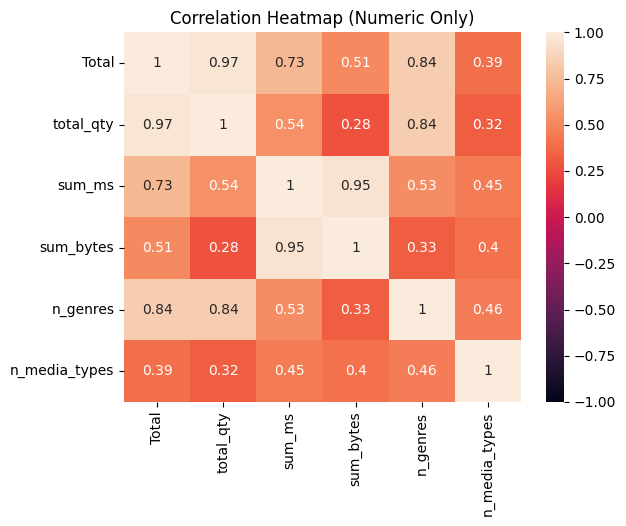

In [ ]:
import seaborn as sns

numeric_values = model_data.drop(columns = 'InvoiceId')

sns.heatmap(numeric_values.corr(numeric_only=True), annot=True, vmin = -1, vmax = 1)
plt.title("Correlation Heatmap (Numeric Only)")
# save the figure
plt.savefig("Top 5 Genres by Total Sales.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
model_combined = pd.concat([numeric_values, encoded_country], axis = 1)
model_combined.shape

(412, 31)

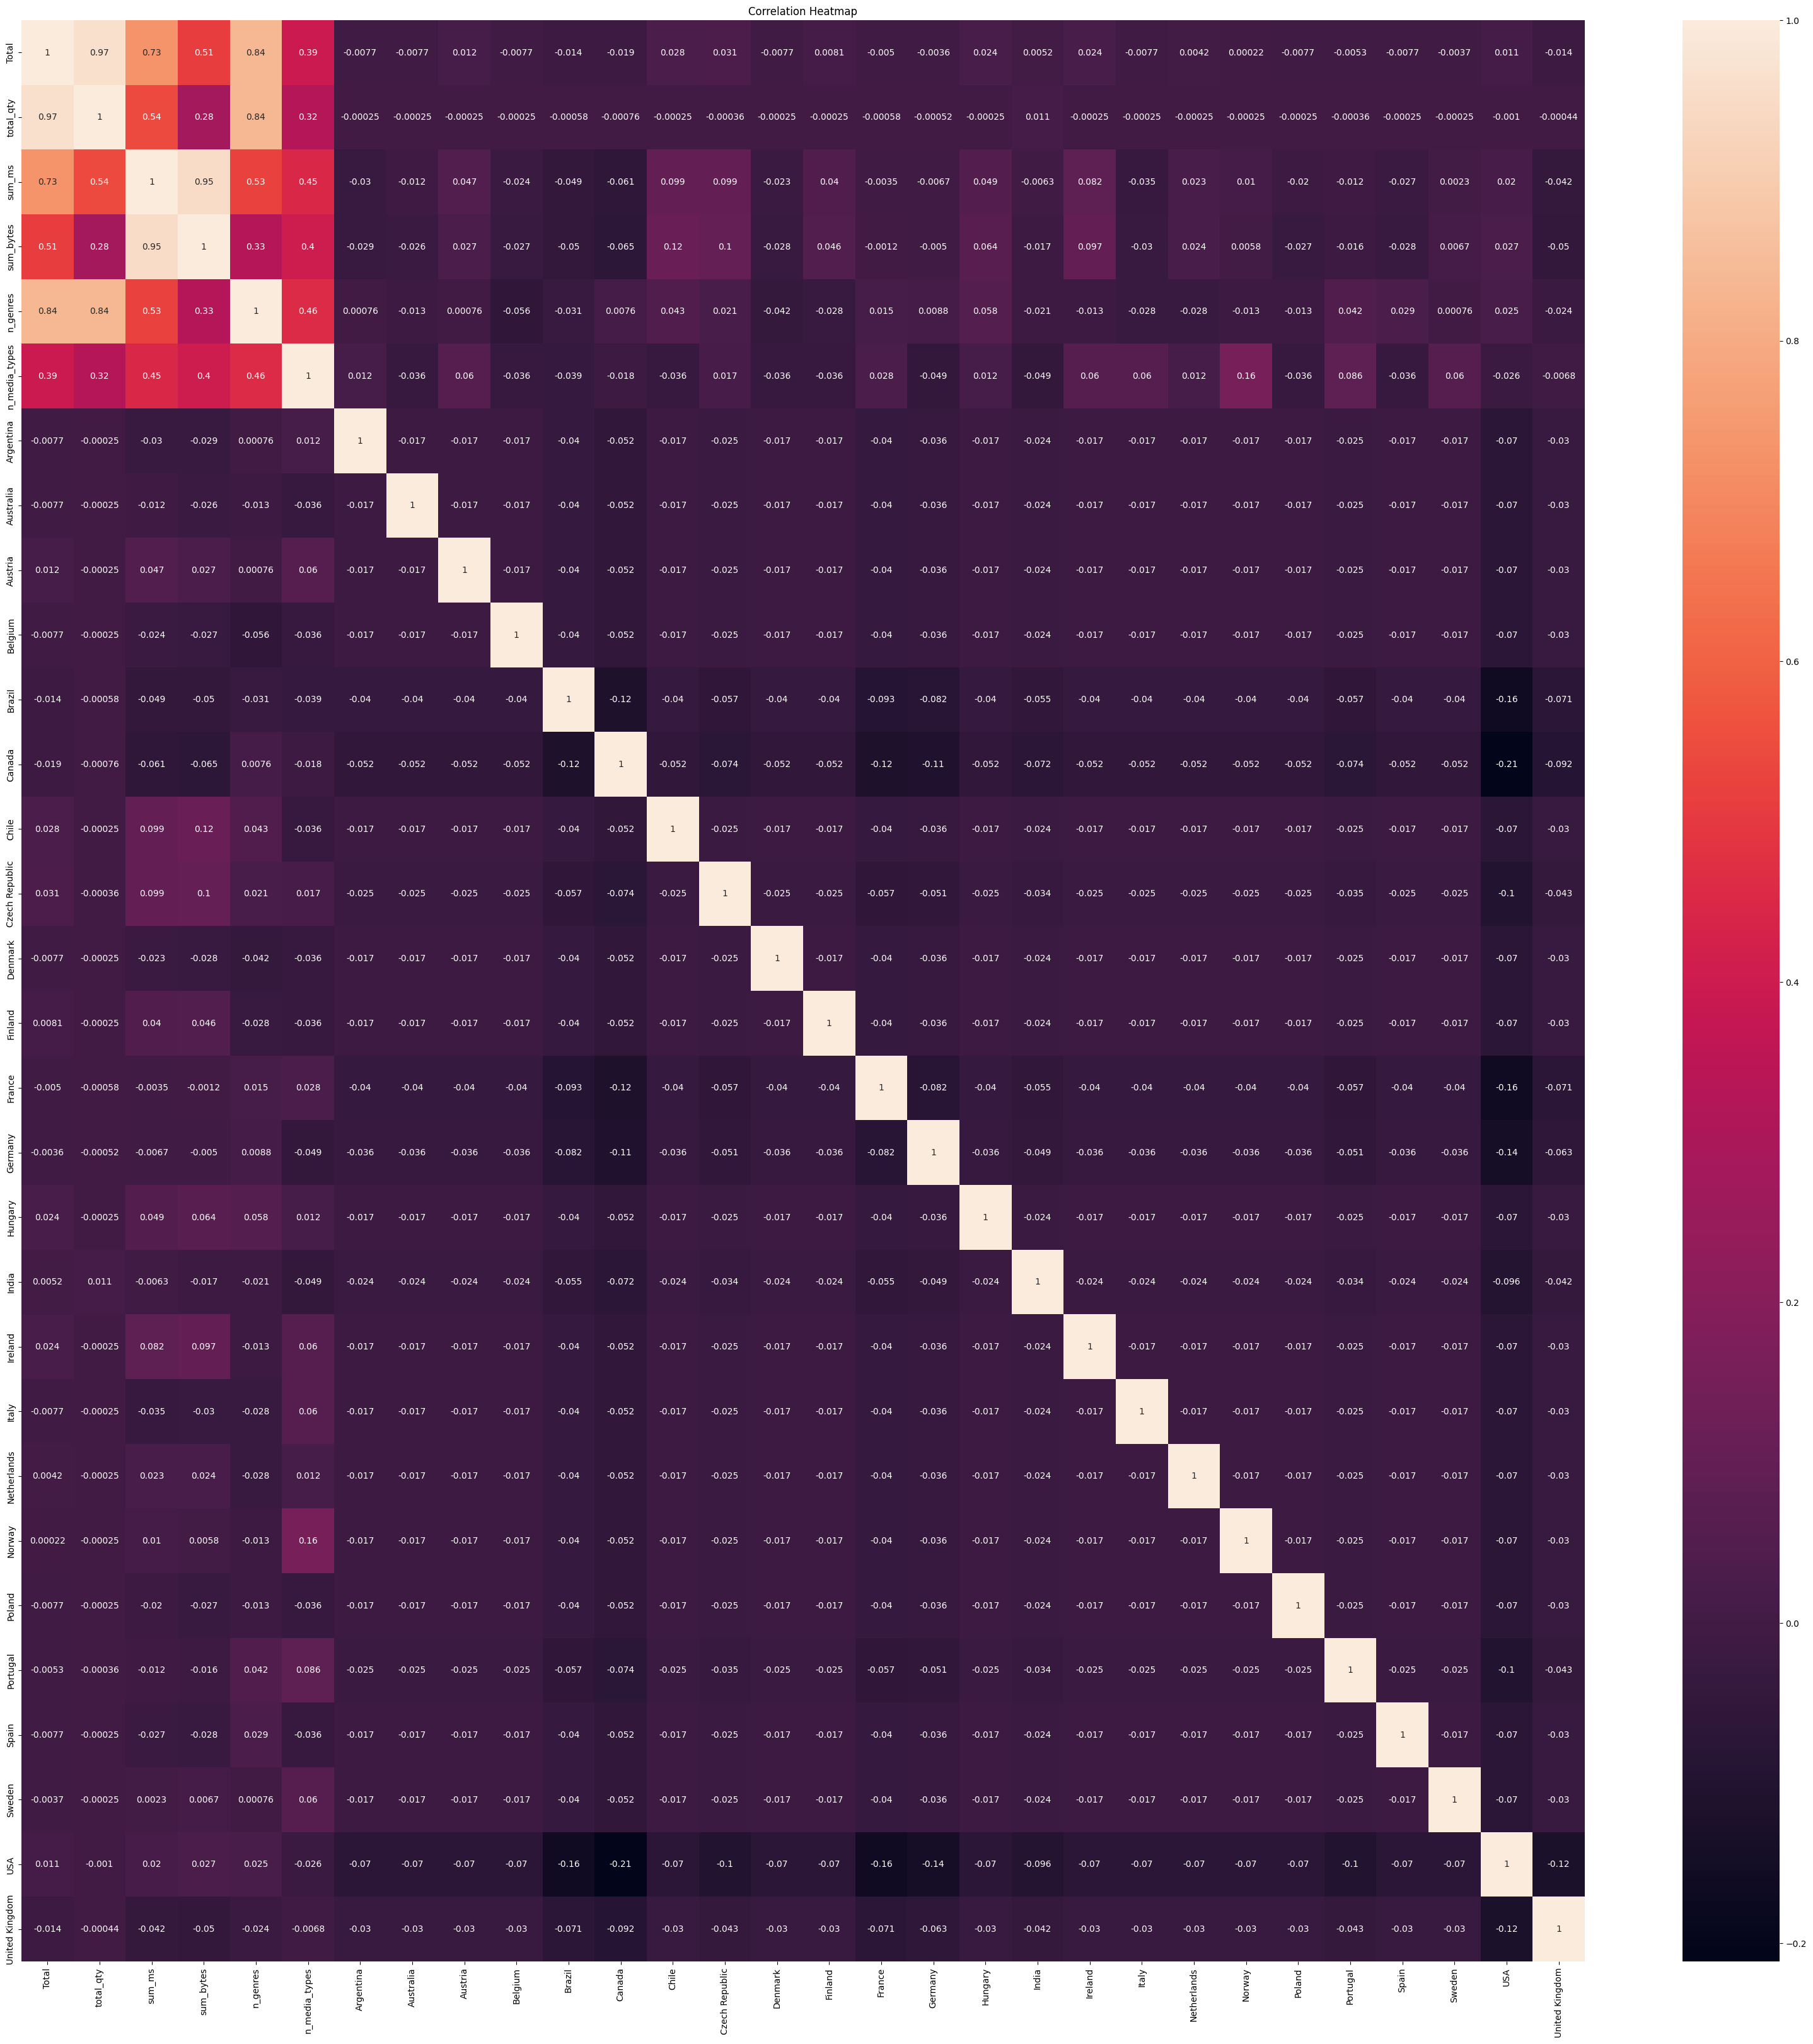

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(model_combined.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
y = model_data['Total']
y

,Total
0,1.98
1,3.96
2,5.94
3,8.91
4,13.86
...,...
407,3.96
408,5.94
409,8.91
410,13.86


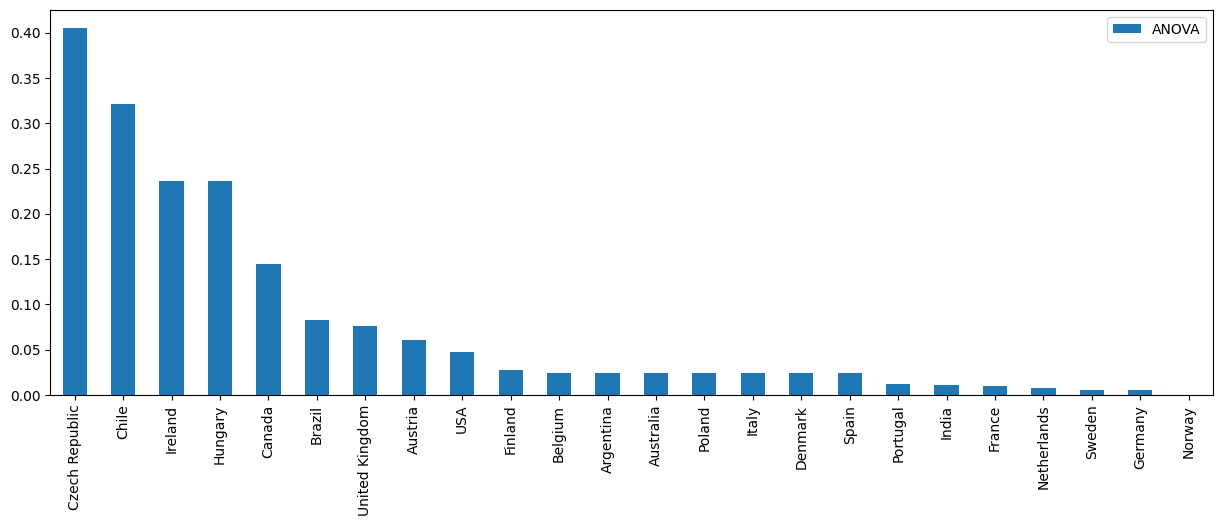

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fvalue_selector = SelectKBest(f_regression, k='all')  #select features best ANOVA F-Values
fvalue_selector.fit_transform(encoded_country, y)

# Plot results
results = pd.DataFrame({'ANOVA': fvalue_selector.scores_}, index = encoded_country.columns)
results.sort_values(by = 'ANOVA', ascending = False).plot(kind = 'bar', figsize = (15,5))

plt.show()

In [ ]:
y.isna().sum().sum()

np.int64(0)

In [ ]:
model_data.isna().sum()

,0
InvoiceId,0
BillingCountry,0
Total,0
total_qty,0
sum_ms,0
sum_bytes,0
n_genres,0
n_media_types,0


In [ ]:
model_data.shape

(412, 8)